# Projeto Final

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(241098)
sns.set()
sns.set(rc={'figure.figsize':(10,6)})

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import  RepeatedStratifiedKFold



In [4]:
# url ='dados/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx'

In [5]:

dados = pd.read_excel("https://github.com/alura-cursos/covid-19-clinical/blob/main/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true")
dados.head(25)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
5,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
6,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,1
7,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,1
8,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.880952,-1.000000,-0.906832,-0.831132,-0.940967,-0.817204,-0.882574,-1.000000,6-12,1
9,1,1,90th,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.142857,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,ABOVE_12,1


## Analíse Exploratoria 

In [6]:
dados.dtypes

PATIENT_VISIT_IDENTIFIER        int64
AGE_ABOVE65                     int64
AGE_PERCENTIL                  object
GENDER                          int64
DISEASE GROUPING 1            float64
                               ...   
RESPIRATORY_RATE_DIFF_REL     float64
TEMPERATURE_DIFF_REL          float64
OXYGEN_SATURATION_DIFF_REL    float64
WINDOW                         object
ICU                             int64
Length: 231, dtype: object

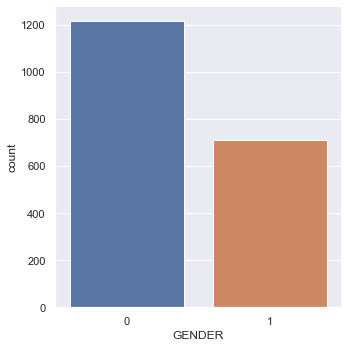

In [7]:
sns.catplot(data=dados, x='GENDER', kind="count")



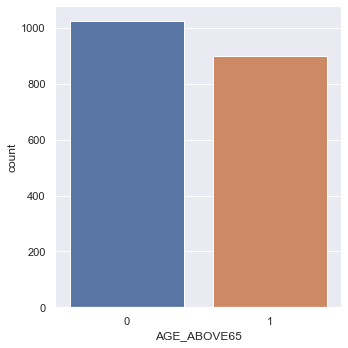

In [8]:
sns.catplot(data=dados, x='AGE_ABOVE65', kind='count')


Pórem pode se notar que o fato de haver cinco linhas(fazendo com que 384 pacienntes virem 1924) pra serem contadas no graficos criados, ele se tornam invalidos.
Será preciso deixar cada paciente com uma linha para poder voltar as analises iniciais.
E tambem so sera contabilizado nos graficos pacientes que testaram positivos, para isso sera usada a janela 'ABOVE_12' pois contem 1 se o paciente foi em qualquer momento diagnosticado.

In [9]:
# df_janela_unica = dados.loc[dados['WINDOW'] < '2-4']
# df_janela_unica




Agora os graficos seram refeitos mas com o seus devidos tamanhado, contabilizando um valor por pessoa

Text(0.5, 0, 'Disease Group')

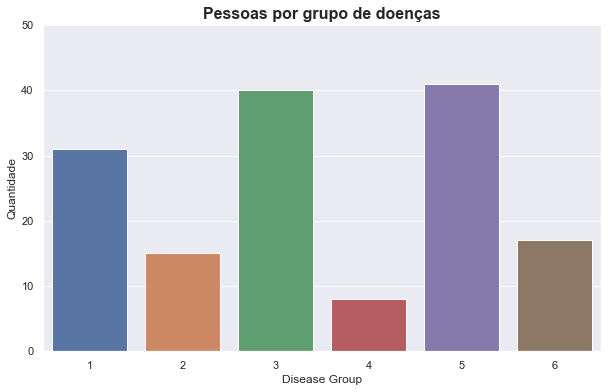

In [10]:
df_janela_unica = dados.loc[(dados['WINDOW'] == 'ABOVE_12') & (dados['ICU'] == 1)]
um = df_janela_unica ['DISEASE GROUPING 1'].sum()
dois =df_janela_unica ['DISEASE GROUPING 2'].sum()
tres =df_janela_unica ['DISEASE GROUPING 3'].sum()
quatro =df_janela_unica ['DISEASE GROUPING 4'].sum()
cinco =df_janela_unica ['DISEASE GROUPING 5'].sum()
seis =df_janela_unica ['DISEASE GROUPING 6'].sum()
lista_grupo = ['1','2','3','4','5','6']
lista_valores = [um, dois, tres, quatro, cinco, seis]

sns.barplot(x=lista_grupo, y=lista_valores)
plt.title('Pessoas por grupo de doenças',  fontweight="bold", fontsize=16)
plt.ylabel('Quantidade')
plt.ylim(0,50)
plt.xlabel('Disease Group')

Das pessoas que testaram positivo, estão mais presentes nos grupos 5 e 3.

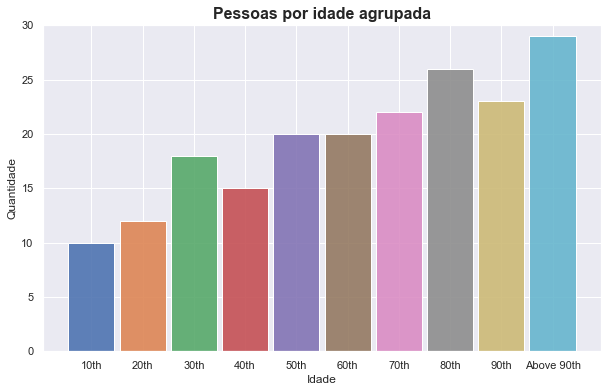

In [11]:

df_janela_unica_hist = df_janela_unica
df_janela_unica_hist['AGE_PERCENTIL'] = pd.Categorical(df_janela_unica_hist['AGE_PERCENTIL'],  ['10th','20th','30th','40th', '50th', '60th', '70th','80th', '90th', 'Above 90th'])

sns.histplot(data=df_janela_unica_hist, x="AGE_PERCENTIL", hue="AGE_PERCENTIL", shrink=.9, alpha=.89,legend=False)
plt.title('Pessoas por idade agrupada',  fontweight="bold", fontsize=16)
plt.ylabel('Quantidade')
plt.ylim(0,30)
plt.xlabel('Idade')

plt.show()

Como o esperado os grupos de idade se encontram em uma tendencia de crecimento.

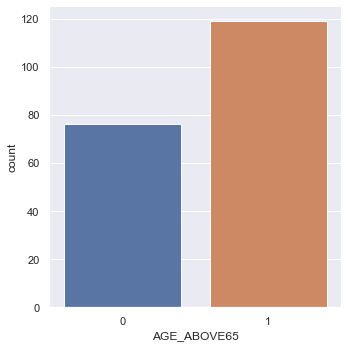

In [12]:
sns.catplot(data=df_janela_unica, x='AGE_ABOVE65', kind='count')


Se nota uma boa diferença em relação entre > 65 anos, mais uma vez como o esperado.

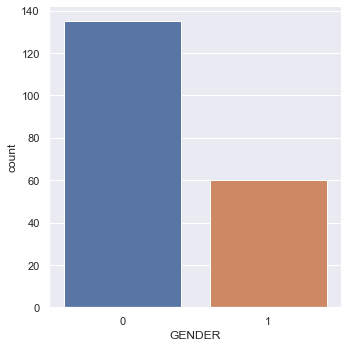

In [13]:
sns.catplot(data=df_janela_unica, x='GENDER', kind="count")


Se pode notar uma predominacia do genero 0, o qual por questões de privacidade não sabemos qual representa. sabe sim so ver antes de entregar.


Para seguir com a analise será usada a media das janelas 0-2 e 2-4 pois ""a soma das duas janelas pega quase 1/3 dos pacientes que foram internados. Sendo 32 pacientes da primeira janela e 27 da segunda.""
Para seguir com a manipulação eu irei seprar os dataframe comforme  os atributos das colunas

In [14]:
# df1 = dados['ICU'].loc[(dados['WINDOW'] == '0-2') & (dados['ICU'] == 1)].sum()
# df2 = dados['ICU'].loc[(dados['WINDOW'] == '2-4') & (dados['ICU'] == 1)].sum()
# df3 = dados['ICU'].loc[(dados['WINDOW'] == '4-6') & (dados['ICU'] == 1)].sum()
# df4 = dados['ICU'].loc[(dados['WINDOW'] == '6-12') & (dados['ICU'] == 1)].sum()
# df5 = dados['ICU'].loc[(dados['WINDOW'] == 'ABOVE_12') & (dados['ICU'] == 1)].sum()
# print('0-2:',32, '2-4:',27,'4-6:',40,  '6-12:',31, 'ABOVE_12:',65)

In [15]:
dados.columns

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6',
       ...
       'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU'],
      dtype='object', length=231)

In [16]:
dados.head(2)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2-4,0


In [17]:
# #### preenchendo os NaN
valor_cat = dados.iloc[:, :13]
valor_alvo = dados.iloc[:, -2:]
valor_num_columns = dados.iloc[:,13:-2].columns
valor_num = dados.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False)[list(valor_num_columns)].fillna(method='bfill').fillna(method='ffill')

dados_cheios = pd.concat([valor_cat, valor_num, valor_alvo], ignore_index=True, axis=1)
dados_cheios.columns = dados.columns
dados_cheios.head()


,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [18]:
a_remover = dados_cheios.query("WINDOW=='0-2' and ICU==1")['PATIENT_VISIT_IDENTIFIER'].values
dados_cheios_sem_W02_ICU1 = dados_cheios.query("PATIENT_VISIT_IDENTIFIER not in @a_remover")
dados_cheios_sem_W02_ICU1 = dados_cheios_sem_W02_ICU1.dropna()

In [19]:
def prepare_window(rows):
    if(np.any(rows["ICU"])):
        rows.loc[rows["WINDOW"]=="0-2", "ICU"] = 1
    return rows.loc[rows["WINDOW"] == "0-2"]

dados_sem_janelas = dados_cheios_sem_W02_ICU1.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False).apply(prepare_window).reset_index()
dados_sem_janelas = dados_sem_janelas.drop(columns=['level_0', 'level_1', 'WINDOW', 'PATIENT_VISIT_IDENTIFIER'])



In [20]:
# arrumar os th 
ordinal_encoder = OrdinalEncoder()
dados_sem_janelas.AGE_PERCENTIL = ordinal_encoder.fit_transform(dados_sem_janelas[["AGE_PERCENTIL"]])
# label_X_valid[object_cols] = ordinal_encoder.transform(X_valid[object_cols])
dados_para_dummy_classifier = dados_sem_janelas
dados_para_dummy_classifier 


,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
0,1,5.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
1,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,1
2,0,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
3,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.882353,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0
4,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.976190,-0.979798,-0.860870,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
348,1,9.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.619048,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.612627,-1.000000,0
349,0,4.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
350,0,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0


In [21]:


y = dados_para_dummy_classifier["ICU"]
x = dados_para_dummy_classifier.drop(["ICU"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
modelo_dummy = DummyClassifier()
modelo_dummy.fit(x_train, y_train)

y_prediction = modelo_dummy.predict(x_test)
accuracy_score(y_test, y_prediction)

0.5340909090909091

In [22]:
def correlacao(dados, pctcorr):
     lista_colunas_altas= set()
     matrix_correlacao = dados.iloc[:,10:-1].corr().abs()
     for i in range(len(matrix_correlacao.columns)):
          for j in range(i):
               if (matrix_correlacao.iloc[i,j]) > pctcorr:
                    nome_col = matrix_correlacao.columns[i]
                    lista_colunas_altas.add(nome_col)
     return lista_colunas_altas


In [23]:
correlacao(dados_para_dummy_classifier, 0.95)

{'ALBUMIN_MAX',
 'ALBUMIN_MEAN',
 'ALBUMIN_MIN',
 'BE_ARTERIAL_MAX',
 'BE_ARTERIAL_MEAN',
 'BE_ARTERIAL_MIN',
 'BE_VENOUS_MAX',
 'BE_VENOUS_MEAN',
 'BE_VENOUS_MIN',
 'BIC_ARTERIAL_MAX',
 'BIC_ARTERIAL_MEAN',
 'BIC_ARTERIAL_MIN',
 'BIC_VENOUS_MAX',
 'BIC_VENOUS_MEAN',
 'BIC_VENOUS_MIN',
 'BILLIRUBIN_MAX',
 'BILLIRUBIN_MEAN',
 'BILLIRUBIN_MIN',
 'BLAST_MAX',
 'BLAST_MEAN',
 'BLAST_MIN',
 'BLOODPRESSURE_DIASTOLIC_DIFF_REL',
 'BLOODPRESSURE_DIASTOLIC_MEDIAN',
 'BLOODPRESSURE_DIASTOLIC_MIN',
 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
 'BLOODPRESSURE_SISTOLIC_MAX',
 'BLOODPRESSURE_SISTOLIC_MEDIAN',
 'BLOODPRESSURE_SISTOLIC_MIN',
 'CALCIUM_MAX',
 'CALCIUM_MEAN',
 'CALCIUM_MIN',
 'CREATININ_MAX',
 'CREATININ_MEAN',
 'CREATININ_MIN',
 'DIMER_MAX',
 'DIMER_MEAN',
 'DIMER_MIN',
 'FFA_MAX',
 'FFA_MEAN',
 'FFA_MIN',
 'GGT_MAX',
 'GGT_MEAN',
 'GGT_MIN',
 'GLUCOSE_MAX',
 'GLUCOSE_MEAN',
 'GLUCOSE_MIN',
 'HEART_RATE_MAX',
 'HEART_RATE_MEDIAN',
 'HEART_RATE_MIN',
 'HEMATOCRITE_MAX',
 'HEMATOCRITE_MEAN',
 'HEM

In [24]:
def correlacaoo(dados, pctcorr,pctcorrmenos):
     lista_colunas_altas_baixas= set()
     matrix_correlacao = dados.iloc[:,10:-1].corr().abs()
     for i in range(len(matrix_correlacao.columns)):
          for j in range(i):
               if (matrix_correlacao.iloc[i,j]) > pctcorr:
                    nome_col = matrix_correlacao.columns[i]
                    lista_colunas_altas_baixas.add(nome_col)
     for i in range(len(matrix_correlacao.columns)):
          for j in range(i):
               if (matrix_correlacao.iloc[i,j]) < pctcorrmenos:
                    nome_col = matrix_correlacao.columns[i]
                    lista_colunas_altas_baixas.add(nome_col)
     return lista_colunas_altas_baixas

In [25]:
correlacaoo(dados_para_dummy_classifier, 0.95, 0.05)

{'ALBUMIN_MAX',
 'ALBUMIN_MEAN',
 'ALBUMIN_MIN',
 'BE_ARTERIAL_MAX',
 'BE_ARTERIAL_MEAN',
 'BE_ARTERIAL_MEDIAN',
 'BE_ARTERIAL_MIN',
 'BE_VENOUS_MAX',
 'BE_VENOUS_MEAN',
 'BE_VENOUS_MEDIAN',
 'BE_VENOUS_MIN',
 'BIC_ARTERIAL_MAX',
 'BIC_ARTERIAL_MEAN',
 'BIC_ARTERIAL_MEDIAN',
 'BIC_ARTERIAL_MIN',
 'BIC_VENOUS_MAX',
 'BIC_VENOUS_MEAN',
 'BIC_VENOUS_MEDIAN',
 'BIC_VENOUS_MIN',
 'BILLIRUBIN_MAX',
 'BILLIRUBIN_MEAN',
 'BILLIRUBIN_MEDIAN',
 'BILLIRUBIN_MIN',
 'BLAST_MAX',
 'BLAST_MEAN',
 'BLAST_MEDIAN',
 'BLAST_MIN',
 'BLOODPRESSURE_DIASTOLIC_DIFF',
 'BLOODPRESSURE_DIASTOLIC_DIFF_REL',
 'BLOODPRESSURE_DIASTOLIC_MAX',
 'BLOODPRESSURE_DIASTOLIC_MEAN',
 'BLOODPRESSURE_DIASTOLIC_MEDIAN',
 'BLOODPRESSURE_DIASTOLIC_MIN',
 'BLOODPRESSURE_SISTOLIC_DIFF',
 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
 'BLOODPRESSURE_SISTOLIC_MAX',
 'BLOODPRESSURE_SISTOLIC_MEAN',
 'BLOODPRESSURE_SISTOLIC_MEDIAN',
 'BLOODPRESSURE_SISTOLIC_MIN',
 'CALCIUM_MAX',
 'CALCIUM_MEAN',
 'CALCIUM_MEDIAN',
 'CALCIUM_MIN',
 'CREATININ_MAX',

In [26]:

# teste
# correlacaoo(dados_para_dummy_classifier, 0.95, 0.05) 
colunas_para_remover = correlacaoo(dados_para_dummy_classifier, 0.95, 0.05)
dados_finais_teste2 = dados_para_dummy_classifier.drop(colunas_para_remover, axis=1)
dados_finais_teste2

def regressao_logistica(dados):
    np.random.seed(241098)

    y = dados["ICU"]
    x = dados.drop(["ICU"], axis=1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=0)
    modelo_rl = LogisticRegression(random_state=0)
    modelo_rl.fit(x_train, y_train)

    y_prediction = modelo_rl.predict(x_test)
    return print ("Acerto:",accuracy_score(y_test, y_prediction) *100)

def floresta(dados, estimator):
    np.random.seed(241098)

    y = dados["ICU"]
    x = dados.drop(["ICU"], axis=1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=0)
    modelo_floresta = RandomForestClassifier(n_estimators=estimator, random_state=0)
    modelo_floresta.fit(x_train, y_train)
    y_prediction = modelo_floresta.predict(x_test)
    return print ("Acerto:",accuracy_score(y_test, y_prediction) *100)

floresta(dados_finais_teste2, 40)
regressao_logistica(dados_finais_teste2)

Acerto: 61.97183098591549
Acerto: 72.72727272727273


In [27]:
colunas_para_remover = correlacao(dados_para_dummy_classifier, 0.95)
dados_finais = dados_para_dummy_classifier.drop(colunas_para_remover, axis=1)
dados_finais

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,ICU
0,1,5.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.500000,-0.247863,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
1,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.714286,-0.435897,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.747001,1
2,0,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.357143,-0.299145,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
3,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.571429,-0.076923,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-0.956805,0
4,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.428571,-0.247863,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,-0.979798,-0.986481,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.357143,-0.418803,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
348,1,9.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.357143,-0.589744,-1.000000,-1.000000,-1.000000,-1.000000,-0.619048,-1.000000,-1.000000,0
349,0,4.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.357143,-0.299145,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
350,0,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.571429,-0.247863,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0


In [28]:
dados_para_dummy_classifier.head()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
0,1,5.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
1,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,1
2,0,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
3,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.882353,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0
4,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.976190,-0.979798,-0.860870,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0


In [29]:
dados_finais.head()


,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,ICU
0,1,5.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.500000,-0.247863,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
1,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.714286,-0.435897,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.747001,1
2,0,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.357143,-0.299145,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
3,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.571429,-0.076923,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-0.956805,0
4,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.428571,-0.247863,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,-0.979798,-0.986481,0


In [30]:
def regressao_logistica(dados):
    np.random.seed(241098)

    y = dados["ICU"]
    x = dados.drop(["ICU"], axis=1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,test_size=0.25, random_state=0)
    modelo_rl = LogisticRegression(random_state=0)
    modelo_rl.fit(x_train, y_train)

    y_pred = modelo_rl.predict(x_test)
    # return print ("Acerto:",accuracy_score(y_test, y_prediction) *100)
    # return print(classification_report(y_test, y_pred))
    return plot_confusion_matrix(modelo_rl, x_test, y_test), print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.83      0.83        47
           1       0.80      0.80      0.80        41

    accuracy                           0.82        88
   macro avg       0.82      0.82      0.82        88
weighted avg       0.82      0.82      0.82        88



(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x18017e28be0>,
 None)

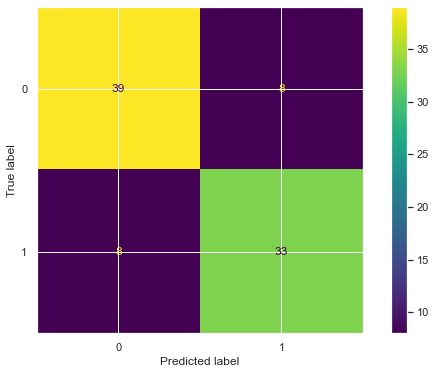

In [31]:
regressao_logistica(dados_finais)
# sem 39 8 8 33

In [32]:
def floresta(dados, estimator):
    np.random.seed(241098)

    y = dados["ICU"]
    x = dados.drop(["ICU"], axis=1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25, random_state=0)
    modelo_floresta = RandomForestClassifier(n_estimators=estimator, random_state=0)
    modelo_floresta.fit(x_train, y_train)
    y_pred = modelo_floresta.predict(x_test)
    # return print ("Acerto:",accuracy_score(y_test, y_prediction) *100)
    return plot_confusion_matrix(modelo_floresta, x_test, y_test), print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.81      0.80        47
           1       0.78      0.76      0.77        41

    accuracy                           0.78        88
   macro avg       0.78      0.78      0.78        88
weighted avg       0.78      0.78      0.78        88



(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x18017df59c0>,
 None)

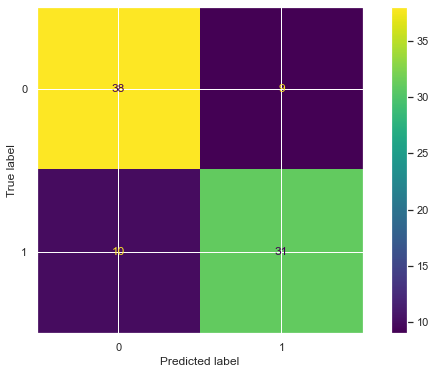

In [33]:
floresta(dados_finais, 40)




In [34]:
cv = StratifiedKFold(n_splits = 5, shuffle=True)
cross_validate(modelo, x, y, cv =cv)
# cross_validate(modelo, x, y, cv = 50)

cvv = RepeatedStratifiedKFold(n_splits = 5, n_repeats=10 )
cross_validate(modelo, x, y, cv =cvv)

NameError: name 'modelo' is not defined

In [ ]:
cv = StratifiedKFold(n_splits = 5, shuffle=True)
cross_validate(modelo, x, y, cv =cv)
# cross_validate(modelo, x, y, cv = 50)

cvv = RepeatedStratifiedKFold(n_splits = 5, n_repeats=10 )
cross_validate(modelo, x, y, cv =cvv)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        47
           1       0.78      0.76      0.77        41

    accuracy                           0.78        88
   macro avg       0.78      0.78      0.78        88
weighted avg       0.78      0.78      0.78        88



(0.7918682513254882,
 None)

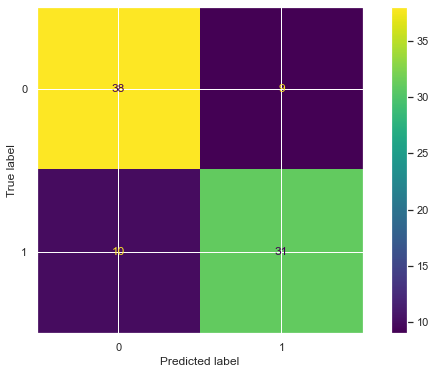

In [ ]:
def floresta(dados, estimator):
    np.random.seed(241098)

    y = dados["ICU"]
    x = dados.drop(["ICU"], axis=1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25, random_state=0)
    modelo_floresta = RandomForestClassifier(n_estimators=estimator, random_state=0)
    modelo_floresta.fit(x_train, y_train)
    y_pred = modelo_floresta.predict(x_test)
    # return print ("Acerto:",accuracy_score(y_test, y_prediction) *100)

    cv = StratifiedKFold(n_splits = 5, shuffle=True)
    cross_validate(modelo_floresta, x, y, cv =cv)
    # cross_validate(modelo, x, y, cv = 50)

    cvv = RepeatedStratifiedKFold(n_splits = 5, n_repeats=10 )
    resultados = cross_validate(modelo_floresta, x, y, cv =cv, scoring='roc_auc', return_train_score=True)

    auc_medio = np.mean(resultados['test_score'])
    # cross_validate(modelo_floresta, x, y, cv =cvv)
    return auc_medio, plot_confusion_matrix(modelo_floresta, x_test, y_test), print(classification_report(y_test, y_pred))

floresta(dados_finais, 40)


links 
https://www.cnnbrasil.com.br/saude/homens-contraem-e-transmitem-mais-covid-19-do-que-as-mulheres-diz-estudo/